<a href="https://colab.research.google.com/github/pragneshrana/DeepLearning/blob/master/TrainingFeedForwardNN/ScalarBackPropogationMultiClassOPTIMIZED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Files



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs


In [2]:
np.random.seed()

In [11]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

## Generate data

In [18]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


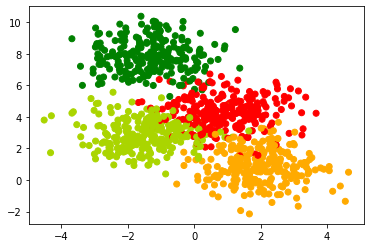

In [19]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [24]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)
print(np.unique(Y_train))

(750, 2) (250, 2)
[0 1 2 3]


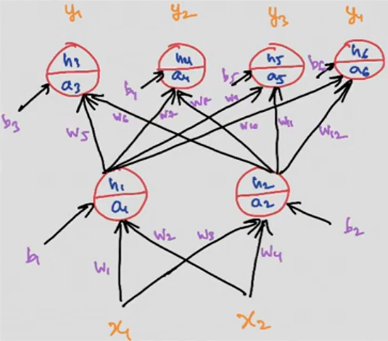

In [ ]:
class FFSN_MultiClass:

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.w11 = np.random.randn()
    self.w12 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0

  def sigmoid(self,x):
    return 1/(1+np.exp(-x))
  
  def forward_pass(self,x):
    self.x1 = self.x2 = x

    #hidden layer
    self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
    self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
    self.h1 = self.sigmoid(a1)
    self.h2 = self.sigmoid(a2)

    #output layer
    self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
    self.a4 = self.w7 * self.h1 + self.w8 * self.h2 + self.b4
    self.a5 = self.w9 * self.h1 + self.w10 * self.h2 + self.b5
    self.a6 = self.w11 * self.h1 + self.w12 * self.h2 + self.b6
    sum_exp = np.sum(np.exp(self.a3) + np.exp(self.a4) +np.exp(self.a5) + np.exp(self.a6) )
    self.h3 = np.exp(self.a3)/sum_exp
    self.h4 = np.exp(self.a4)/sum_exp
    self.h5 = np.exp(self.a5)/sum_exp
    self.h6 = np.exp(self.a6)/sum_exp

    return np.array([self.h3,self.h4,self.h5,self.h6])

  def grad(self,x,y):
    self.forward_pass(x)
    self.y1 = self.y2 = self.y3 = self.y4 = y
    self.dw5 = (self.h3 - self.y1) * self.h1
    


  
  

SyntaxError: ignored

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)

(750, 2) (250, 2) (1000,)


In [ ]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 4) (250, 4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


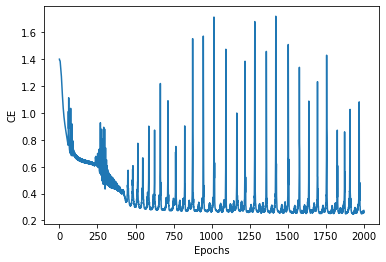

In [ ]:
ffsn_multi = FFSN_MultiClass(2,4,[2,3])
ffsn_multi.fit(X_train,y_OH_train,epochs=2000,learning_rate=.005,display_loss=True)

In [ ]:
Y_pred_train = ffsn_multi.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)

Y_pred_val = ffsn_multi.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val,1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.9
Validation accuracy 0.91


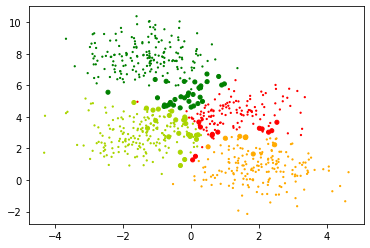

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()

# FF Network

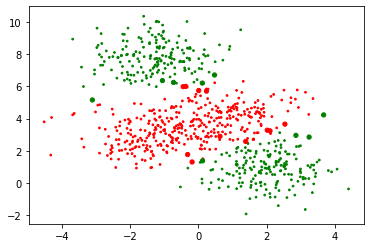

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

# Plots - to visulize and interpreat role of each weights

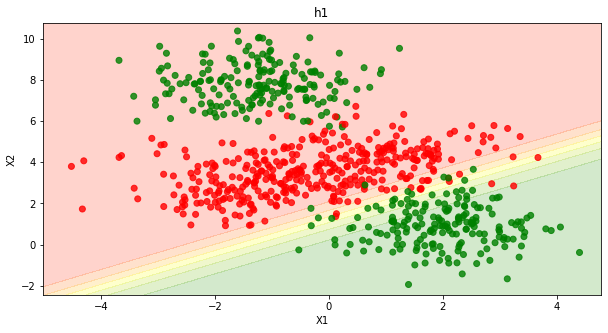

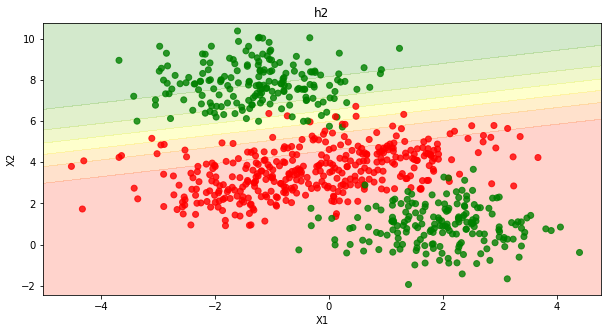

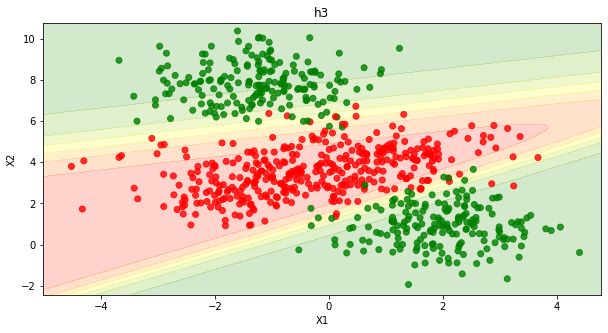

True

In [ ]:
def make_meshgrid(x,y,h=0.2):
  x_min, x_max = x.min() - 0.5, x.max()+0.5
  y_min, y_max = y.min() - 0.5, y.max()+0.5
  xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                       np.arange(y_min,y_max,h))
  return xx,yy

def plot_contours(ax,predict,xx,yy,**params):
  Z = predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx,yy,Z,**params)
  return out

def plot_boundary():
  xx, yy = make_meshgrid(X_train[:,0],X_train[:,1])
  predict_function = [ffn.predict_h1,ffn.predict_h2,ffn.predict_h3]

  for i in range(3):
    fig , ax = plt.subplots(figsize=(10,5))
    plot_contours(ax, predict_function[i],xx,yy,cmap=my_cmap, alpha=0.2)
    ax.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=my_cmap,alpha=0.8)
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('h'+str(i+1))
    plt.show()

  return True

plot_boundary()



Observation:

- By comparing plots it is clear that h1, h2 individually seperates the boundary(thin comapred to plot-3).
- Where as , h3 combines both and also change is function value become smaller.


# Visulizing the weights



In [ ]:
import seaborn as sns
def plot_heat_map(epoch):
  fig = plt.figure()
  sns.heatmap(weight_matrices[epoch],annot=True,cmap=my_cmap,vmin=-3,vmax=3)
  plt.title('Epoch'+str(epoch))
  fig.canvas.draw()
  image = np.frombuffer(fig.canvas.tostring_rgb(),dtype='uint8')
  image = image.reshape(fig.canvas.get_width_height()[::-1]+(3,))
  return image




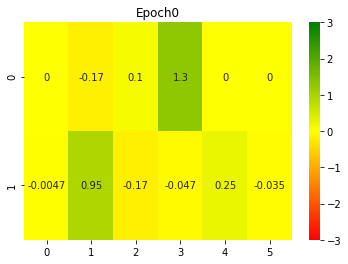

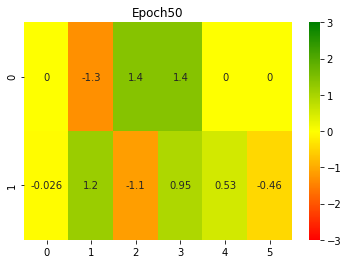

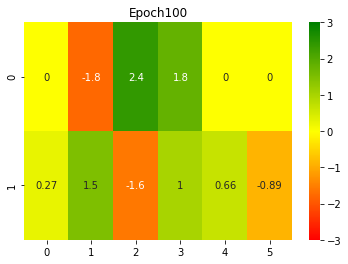

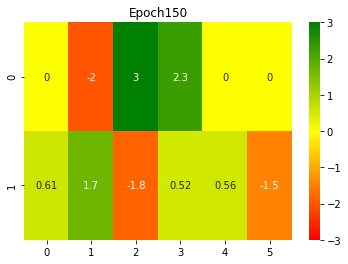

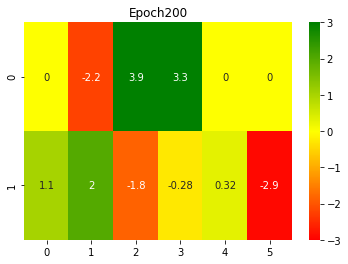

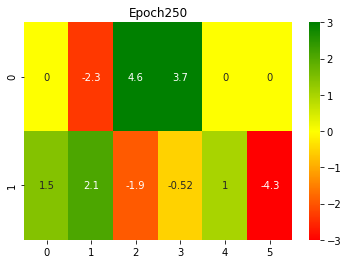

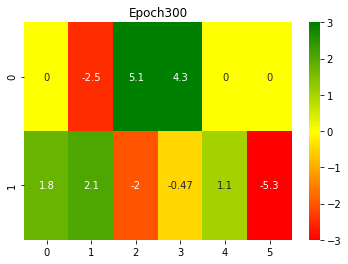

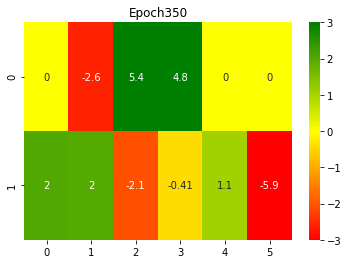

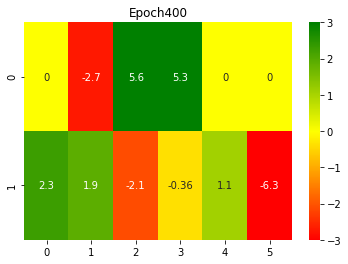

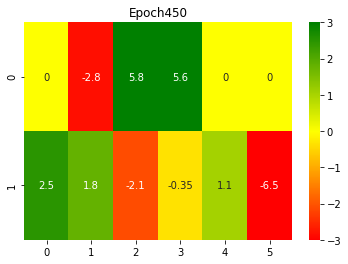

In [ ]:
import imageio
imageio.mimsave('./weights_viz.gif',[plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//10)],fps=1)

In [ ]:
from IPython import display
HTML('<img src="weights_viz.gif">')

In [ ]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_train >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_train) 
print(accuracy_train)


0.9733333333333334
